<a href="https://colab.research.google.com/github/NonRelDat/twitter/blob/main/Kopia_notatnika_Kopia_notatnika_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tweepy
from tqdm import tqdm
import time
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import nltk
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import *
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/pl_covid_tweets_clean.txt', sep ='\t')
tweetsids_list = df['tweet_id'].tolist()

In [ ]:
api_key = 'DJpwoitSKBT9NRqBUaEF3h6nG'
api_key_secret = 'Vj2tgp5lRQCm3i750LHlnIlU4G8KN6bVa6HGYEepbuzUpvX8Oe'
access_token = '1463526158754992129-dPQL4yI5nIT4N4vIR8U3l8Fb02qYEC'
access_token_secret = '9hEt4aERZR87y6dz28pxNInJRQ98S9ztTgKG1xbdO49RG'

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
 portion_list = list()
 portion_size=100
 for i in range(0,len(tweetsids_list), portion_size):
   portion_list.append(tweetsids_list[i:i+portion_size])
 print(len(portion_list))

5839


In [ ]:
tweets_list =[]
for portion in tqdm(portion_list):
  while True:
    try:
      r = api.statuses_lookup(portion)
      break
    except:
      time.sleep(1) 
  for tweet in r:
    tweets_list.append(tweet.text)

100%|██████████| 5839/5839 [1:35:16<00:00,  1.02it/s]


In [ ]:
df = pd.DataFrame({'tweet':tweets_list})
df.to_csv('tweet_all.csv', index=False)
df.to_excel('tweet_all.xlsx', index=False)

Cleaning data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/tweet_all.csv')

In [ ]:
!wget https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt

--2022-01-16 16:46:59--  https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2016 (2.0K) [text/plain]
Saving to: ‘polish.stopwords.txt’

polish.stopwords.tx 100%[===================>]   1.97K  --.-KB/s    in 0s      

2022-01-16 16:46:59 (30.0 MB/s) - ‘polish.stopwords.txt’ saved [2016/2016]



In [ ]:
stop_words =[]
with open('/content/polish.stopwords.txt', 'r') as polish_stopwords:
  for stopword in polish_stopwords:
    stopword = stopword.strip()
    stop_words.append(stopword)

In [ ]:
df["tweet"] = df["tweet"].str.lower()
df['tweet_without_stopwords'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['clean_tweet']=''

In [ ]:
#Removing useless things

df['clean_tweet'] = df['tweet_without_stopwords'].str.replace(r'http\S+', '')
df['clean_tweet'] = df['clean_tweet'].str.replace(r'@\S+', '')
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[^\w\s]', '')
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[0-9]+', '')
df.head()

,tweet,tweet_without_stopwords,clean_tweet
0,"kiedy #coronavirus dotrze do polski, napotka o...","#coronavirus dotrze polski, napotka opór znako...",coronavirus dotrze polski napotka opór znakomi...
1,kolejni polacy chcą wrócić z wuhan https://t.c...,kolejni polacy chcą wrócić wuhan https://t.co/...,kolejni polacy chcą wrócić wuhan
2,a tymczasem w wuhan odcięto od reszty świata o...,tymczasem wuhan odcięto reszty świata obszar p...,tymczasem wuhan odcięto reszty świata obszar p...
3,@patrykwachowiec @kancelariasejmu nie zdziwię ...,"@patrykwachowiec @kancelariasejmu zdziwię się,...",zdziwię się powiedzą listy pojechały chin wu...
4,".@msz_rp: 19 polaków chce wrócić z wuhan, w am...",".@msz_rp: 19 polaków chce wrócić wuhan, ambasa...",polaków chce wrócić wuhan ambasadzie rp peki...


In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

for index, row in df.iterrows():
  tweet = row[2]
  tweet = emoji_pattern.sub(r'', tweet)
  df.at[index , 'clean_tweet'] = tweet

In [ ]:
df['clean_tweet'] = df['clean_tweet'].str.replace(r'(.)1+', r'1')
df.head()

,tweet,tweet_without_stopwords,clean_tweet
0,"kiedy #coronavirus dotrze do polski, napotka o...","#coronavirus dotrze polski, napotka opór znako...",coronavirus dotrze polski napotka opór znakomi...
1,kolejni polacy chcą wrócić z wuhan https://t.c...,kolejni polacy chcą wrócić wuhan https://t.co/...,kolejni polacy chcą wrócić wuhan
2,a tymczasem w wuhan odcięto od reszty świata o...,tymczasem wuhan odcięto reszty świata obszar p...,tymczasem wuhan odcięto reszty świata obszar p...
3,@patrykwachowiec @kancelariasejmu nie zdziwię ...,"@patrykwachowiec @kancelariasejmu zdziwię się,...",zdziwię się powiedzą listy pojechały chin wu...
4,".@msz_rp: 19 polaków chce wrócić z wuhan, w am...",".@msz_rp: 19 polaków chce wrócić wuhan, ambasa...",polaków chce wrócić wuhan ambasadzie rp peki...


In [ ]:
clean_tweet = df['clean_tweet']
clean_tweet.to_excel('cleantweets.xlsx',index=False)

Word embedding

In [ ]:
clean_tweet = pd.read_excel('/content/cleantweets.xlsx')

vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(clean_tweet['clean_tweet'])

K-means

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_cv)
clean_tweet['cluster'] = kmeans.predict(X_cv)

In [ ]:
clean_tweet['Sentiment']=''
clean_tweet.loc[clean_tweet['cluster'] == 0 , 'Sentiment'] = 'Negative'
clean_tweet.loc[clean_tweet['cluster'] == 1 , 'Sentiment'] = 'positive'
clean_tweet.head()
clean_tweet.to_excel('clustered_data.xlsx',index=False)

Machine learning

In [ ]:
ml_data = pd.read_excel('/content/clustered_data.xlsx')
ml_data.head()

,clean_tweet,cluster,Sentiment
0,coronavirus dotrze polski napotka opór znakomi...,0,Negative
1,kolejni polacy chcą wrócić wuhan,0,Negative
2,tymczasem wuhan odcięto reszty świata obszar p...,0,Negative
3,zdziwię się powiedzą listy pojechały chin wu...,0,Negative
4,polaków chce wrócić wuhan ambasadzie rp peki...,0,Negative


In [ ]:
from nltk.tokenize import SpaceTokenizer
space_tokenizer = SpaceTokenizer()
ml_data['clean_tweet'] = ml_data['clean_tweet'].apply(space_tokenizer.tokenize)
ml_data.head()

,clean_tweet,cluster,Sentiment
0,"[coronavirus, dotrze, polski, napotka, opór, z...",0,Negative
1,"[kolejni, polacy, chcą, wrócić, wuhan, ]",0,Negative
2,"[tymczasem, wuhan, odcięto, reszty, świata, ob...",0,Negative
3,"[, , zdziwię, się, powiedzą, listy, pojechały,...",0,Negative
4,"[, , polaków, chce, wrócić, wuhan, ambasadzie,...",0,Negative


In [ ]:
st = PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
ml_data['clean_tweet']= ml_data['clean_tweet'].apply(lambda x: stemming_on_text(x))
ml_data.head()

,clean_tweet,cluster,Sentiment
0,"[coronavirus, dotrze, polski, napotka, opór, z...",0,Negative
1,"[kolejni, polacy, chcą, wrócić, wuhan, ]",0,Negative
2,"[tymczasem, wuhan, odcięto, reszty, świata, ob...",0,Negative
3,"[, , zdziwię, się, powiedzą, listy, pojechały,...",0,Negative
4,"[, , polaków, chce, wrócić, wuhan, ambasadzie,...",0,Negative


In [ ]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
ml_data['clean_tweet']= ml_data['clean_tweet'].apply(lambda x: lemmatizer_on_text(x))
ml_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,clean_tweet,cluster,Sentiment
0,"[coronavirus, dotrze, polski, napotka, opór, z...",0,Negative
1,"[kolejni, polacy, chcą, wrócić, wuhan, ]",0,Negative
2,"[tymczasem, wuhan, odcięto, reszty, świata, ob...",0,Negative
3,"[, , zdziwię, się, powiedzą, listy, pojechały,...",0,Negative
4,"[, , polaków, chce, wrócić, wuhan, ambasadzie,...",0,Negative


In [ ]:
ml_data.to_excel('ML_ready.xlsx', index=False)

training, testing and validation set

In [ ]:
X=ml_data.clean_tweet
y=ml_data.cluster
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state =42)

TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=99255)
X_train = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectorizer.get_feature_names()))
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=99255)
X_test = vectorizer.fit_transform(X_test.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  99255
No. of feature_words:  99255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def Evaluate(model):
  y_pred = model.predict(X_test)

 

  # confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'BuPu',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Naive Bayes

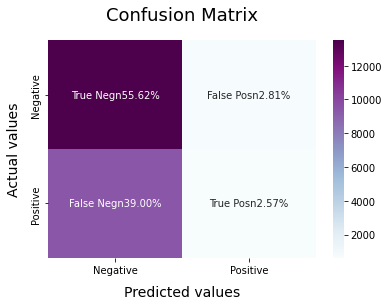

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
Evaluate(BNBmodel)
y_pred_bayes = BNBmodel.predict(X_test)

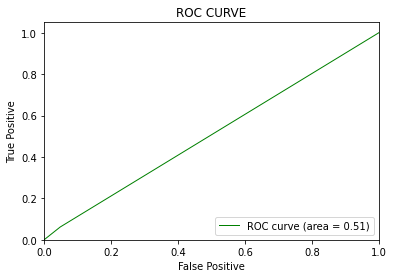

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_bayes)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Logistic regression


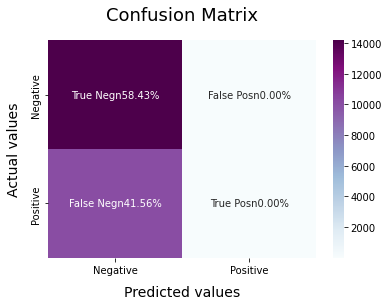

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(max_iter = 1000)
LRmodel.fit(X_train, y_train)
Evaluate(LRmodel)
y_pred_lr = LRmodel.predict(X_test)

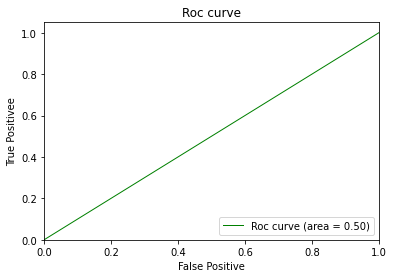

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label='Roc curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positivee')
plt.title('Roc curve')
plt.legend(loc="lower right")
plt.show()

Support-vector machine

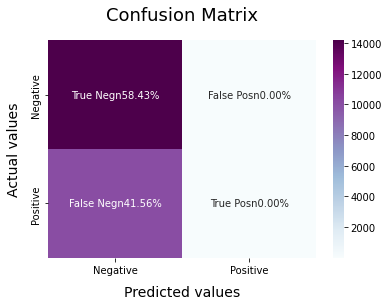

In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
Evaluate(SVCmodel)
y_pred_svm = SVCmodel.predict(X_test)

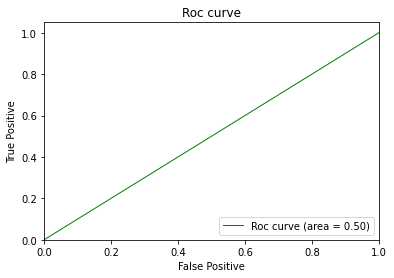

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label='Roc curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Roc curve')
plt.legend(loc="lower right")
plt.show()